# ** codon usage bias sim except not the 100kbp exon (its super weird) ** 
    1) i simulate a string oc coding sequence (long one, maybe that 40k one a while back?) 
    2) randomize the synonymous cites 
    3) run 

** load in the data ** 

In [11]:
import json 
import random
import numpy as np
import matplotlib.pyplot as plt
from Bio import SeqIO
from datetime import datetime
from numpy.random import choice

In [2]:
plt.style.use("seaborn-ticks")

In [3]:
model = json.load(open("../Human_mutability_model/Model_2020_12_02_genomeWide.txt"))

SynonymousCodons = {'CYS': ['TGT', 'TGC'], 'ASP': ['GAT', 'GAC'],
'SER': ['TCT', 'TCG', 'TCA', 'TCC', 'AGC', 'AGT'],
'GLN': ['CAA', 'CAG'], 'MET': ['ATG'], 'ASN': ['AAC', 'AAT'],
'PRO': ['CCT', 'CCG', 'CCA', 'CCC'], 'LYS': ['AAG', 'AAA'],
'STOP': ['TAG', 'TGA', 'TAA'], 'THR': ['ACC', 'ACA', 'ACG', 'ACT'],
'PHE': ['TTT', 'TTC'], 'ALA': ['GCA', 'GCC', 'GCG', 'GCT'],
'GLY': ['GGT', 'GGG', 'GGA', 'GGC'], 'ILE': ['ATC', 'ATA', 'ATT'],
'LEU': ['TTA', 'TTG', 'CTC', 'CTT', 'CTG', 'CTA'], 'HIS': ['CAT', 'CAC'],
'ARG': ['CGA', 'CGC', 'CGG', 'CGT', 'AGG', 'AGA'], 'TRP': ['TGG'],
'VAL': ['GTA', 'GTC', 'GTG', 'GTT'], 'GLU': ['GAG', 'GAA'], 'TYR': ['TAT', 'TAC']}

get_aa_dict = {}#dictionary that turns codon into aa 
for key,value in SynonymousCodons.items(): 
    for codon in value: 
        get_aa_dict[codon] = key 


In [82]:
#finding a long ass exon 
cds_file_obj = open("../Human_exon_data/Homo_sapiens.GRCh38.cds.all.fa")
exon_lengths = []
cds_lowerLim = 4000
cds_upperLim = 6000
cdsPots = []
for gene in SeqIO.parse(cds_file_obj, "fasta"): 
    if cds_lowerLim <= len(gene.seq) <= cds_upperLim: 
        cdsPots.append(gene.id)
cds_file_obj.close()

In [89]:
n_exons = 22
cdsChosen_list = list(choice(cdsPots, size = n_exons))

In [90]:
#converting to a string
for index, name in enumerate(cdsChosen_list): 
    cdsChosen_list[index] = str(name)

In [91]:
cdsChosen_dict = {}

for gene in SeqIO.parse("../Human_exon_data/Homo_sapiens.GRCh38.cds.all.fa", "fasta"): 
    if gene.id in cdsChosen_list: 
        cdsChosen_dict[gene.id] = str(gene.seq)

In [94]:
total_length = 0
for name, cds in cdsChosen_dict.items(): 
    total_length+= len(cds)
    
print("total length of all exons", total_length)

total length of all exons 105327


** randomly assign one of the syn codons ** 

In [165]:
cdsrandom_dict = {}
cds_iterator = 1
for key, cds in cdsChosen_dict.items():
    new_dna = str()
    for i in range(0,len(cds),3): 
        codon  = cds[i:i+3]
        aa = get_aa_dict[codon]
        new_codon = random.choice(SynonymousCodons[aa])
        new_dna += new_codon
    cdsrandom_dict[key] = [cds_iterator, new_dna]
    cds_iterator += 1

** make the dna map and add invariant sites ** 

In [167]:
for key, value in cdsrandom_dict.items(): 
    num_3s_added = 0
    cds=value[1]
    new_dna_map = str()
    new_dna_map = "012"*int(len(cds)/3)
    invarSitesIndices = random.sample(range(0, int(len(cds)/3)), int(len(cds)/(3*2)))
    for codon_index in invarSitesIndices: 
        adj_codon_index = codon_index*3
        new_dna_map = new_dna_map[:adj_codon_index]+"333"+new_dna_map[adj_codon_index+3:]
        num_3s_added += 3
    value.append(new_dna_map)
#     print(len(cds)/num_3s_added, len(cds)/new_dna_map.count("3"), len(cds)/(len(invarSitesIndices)*3))

In [163]:
#double checking 
# for key, value in cdsrandom_dict.items(): 
#     print(len(value[1])/(value[1]).count("3"))

In [164]:
file = open("data/redo_multDif_exons_2021_02_07/all_coding_dict.txt", "w+")
file.write(json.dumps(cdsrandom_dict))
file.close()

** save dna string for sims ** 

In [192]:
!rm data/redo_multDif_exons_2021_02_07/*Trial{}*

In [177]:
for key,value in cdsrandom_dict.items(): 
    file = open("data/redo_multDif_exons_2021_02_07/CodingUsage_cds{N}_DNA_gen0.txt".format(N=key), "w+")
    file.write(str(value[1]))
    file.close()

    file = open("data/redo_multDif_exons_2021_02_07/CodingUsage_cds{N}_MAP.txt".format(N=key), "w+")
    file.write(str(value[2]))
    file.close()

** saving the list of cds names and first (general to gen0 and map) file location to a file to iterate through for sim running **

In [178]:
cdsNames_list = []
for key in cdsrandom_dict.keys(): 
    cdsNames_list.append(key)

In [191]:
file = open("data/redo_multDif_exons_2021_02_07/cdsNames_list.txt", "w+")
file.write(cdsNames_list[0]+"\n")
file.close()

for element in cdsNames_list[1:]: 
    file = open("data/redo_multDif_exons_2021_02_07/cdsNames_list.txt", "a+")
    file.write(element+"\n")
    file.close()

In [182]:
str(cdsNames_list)

"['ENST00000460012.6', 'ENST00000361961.7', 'ENST00000646038.1', 'ENST00000644316.1', 'ENST00000674475.1', 'ENST00000434032.6', 'ENST00000395438.5', 'ENST00000650632.1', 'ENST00000418533.6', 'ENST00000361713.1', 'ENST00000355774.6', 'ENST00000413186.6', 'ENST00000301624.8', 'ENST00000648892.1', 'ENST00000636805.1', 'ENST00000356297.5', 'ENST00000257209.8', 'ENST00000357063.7', 'ENST00000625760.2', 'ENST00000338382.10', 'ENST00000433039.1', 'ENST00000504076.5']"

# ** APPENDIX ** 

In [76]:
new_dna = str()
new_codons = []
for codon in codons: 
    aa = get_aa_dict[codon]
    new_codon = random.choice(SynonymousCodons[aa])
    new_codons.append(new_codon)
    new_dna += new_codon

(array([ 94568.,  12829.,   2340.,    748.,    214.]),
 array([    0,  2000,  4000,  6000,  8000, 10000]),
 <a list of 5 Patch objects>)

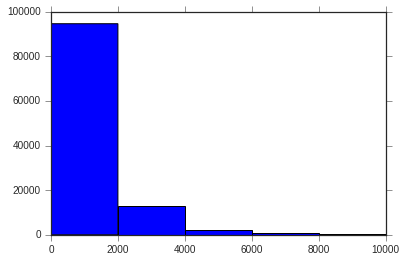

In [8]:
plt.hist(exon_lengths, bins = [0,2000,4000,6000,8000,10000])

(array([ 253.,   72.,   18.,   11.,    0.,    0.]),
 array([10000, 15000, 20000, 25000, 30000, 35000, 40000]),
 <a list of 6 Patch objects>)

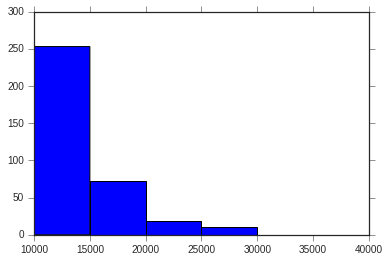

In [9]:
plt.hist(exon_lengths, bins = [10000,15000,20000,25000,30000,35000,40000])